In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
url = "https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.csv"
data = pd.read_csv(url, delimiter = ';')

In [5]:
data.set_index('Date_of_report', inplace=True)

In [21]:
data.index = pd.to_datetime(data.index)
data.Date_of_publication = pd.to_datetime(data.Date_of_publication)

In [22]:
gr_data = data.groupby(data.Date_of_publication).sum()

In [51]:
def vline(date):
    plt.vlines(date, 0, 12500, linestyle = '--', color = 'k', linewidth = 1)

(-900, 20000)

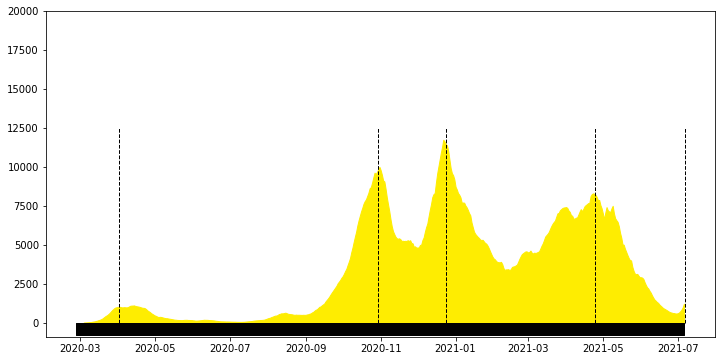

In [60]:
plt.figure(figsize=(12,6))
plt.fill_between(gr_data.index, gr_data['Total_reported']*0, gr_data['Total_reported'].rolling(7).mean(), 
                color = (254/255, 237/255, 1/255))

plt.fill_between(gr_data.index, np.ones(len(gr_data.index))*-800, gr_data['Total_reported']*0,
                color = 'black')

vline(dt.datetime(2020, 4,2))
vline(dt.datetime(2020, 10,30))
vline(dt.datetime(2020,12,24))
vline(dt.datetime(2021,4,25))
vline(dt.datetime.today())
plt.ylim(-900, 20000)

In [32]:
np.ones_like(gr_data.index)

array(['1970-01-01T00:00:00.000000001', '1970-01-01T00:00:00.000000001',
       '1970-01-01T00:00:00.000000001', '1970-01-01T00:00:00.000000001',
       '1970-01-01T00:00:00.000000001', '1970-01-01T00:00:00.000000001',
       '1970-01-01T00:00:00.000000001', '1970-01-01T00:00:00.000000001',
       '1970-01-01T00:00:00.000000001', '1970-01-01T00:00:00.000000001',
       '1970-01-01T00:00:00.000000001', '1970-01-01T00:00:00.000000001',
       '1970-01-01T00:00:00.000000001', '1970-01-01T00:00:00.000000001',
       '1970-01-01T00:00:00.000000001', '1970-01-01T00:00:00.000000001',
       '1970-01-01T00:00:00.000000001', '1970-01-01T00:00:00.000000001',
       '1970-01-01T00:00:00.000000001', '1970-01-01T00:00:00.000000001',
       '1970-01-01T00:00:00.000000001', '1970-01-01T00:00:00.000000001',
       '1970-01-01T00:00:00.000000001', '1970-01-01T00:00:00.000000001',
       '1970-01-01T00:00:00.000000001', '1970-01-01T00:00:00.000000001',
       '1970-01-01T00:00:00.000000001', '1970-01-01